In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop(columns = ['RowNumber','CustomerId','Surname'],axis = 1)

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Geography'] = df['Geography'].map({'France':0,'Germany':1,'Spain':2})
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

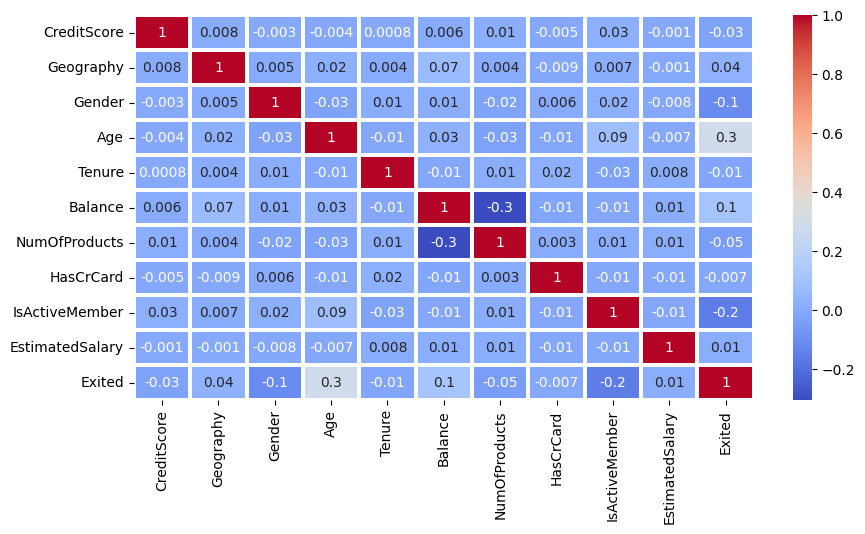

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='0.1g',linewidth=1.5,linecolor='white',cbar=True)

In [10]:
X = df.drop('Exited',axis = 1)
Y = df['Exited']

In [11]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57


In [12]:
Y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
X_res,Y_res = SMOTE().fit_resample(X,Y)

In [15]:
Y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.2,random_state=42)

In [17]:
print(X_train.shape,X_test.shape,Y_train.shape)

(12740, 10) (3186, 10) (12740,)


In [18]:
# standardSCaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [19]:
X_train

array([[-0.71988968,  0.43390993, -0.84347226, ...,  0.78755744,
        -0.76625282, -1.70679686],
       [ 1.09483152, -0.89016493,  1.18557544, ..., -1.26974865,
         1.30505229,  0.74613359],
       [-0.02442766, -0.89016493, -0.84347226, ..., -1.26974865,
        -0.76625282, -0.28187281],
       ...,
       [ 0.20377081, -0.89016493,  1.18557544, ...,  0.78755744,
        -0.76625282, -0.05233295],
       [-2.23034625, -0.89016493, -0.84347226, ..., -1.26974865,
        -0.76625282,  0.23414345],
       [ 0.52976864,  0.43390993,  1.18557544, ...,  0.78755744,
         1.30505229, -0.81430996]])

In [20]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

In [21]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
LOG_RERESS = accuracy_score(Y_test,y_pred)

In [25]:
print('Accuracy score on test score:',LOG_RERESS)

Accuracy score on test score: 0.7671060891399875


In [26]:
# DTC
dtc  = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [27]:
y_pred2 = dtc.predict(X_test)

In [28]:
DTC = accuracy_score(Y_test,y_pred2)

In [29]:
print('ACcuracy_score on test score:',DTC)

ACcuracy_score on test score: 0.7984934086629002


In [30]:
#RFC
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [31]:
y_pred3 = rfc.predict(X_test)

In [32]:
RFC = accuracy_score(Y_test,y_pred3)

In [33]:
print('Accuracy_score on the test score:',RFC)

Accuracy_score on the test score: 0.8650345260514752


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [36]:
y_pred4 = gbc.predict(X_test)

In [37]:
gbc_score = accuracy_score(Y_test,y_pred4)
print('Accuracy on Test score:',gbc_score)

Accuracy on Test score: 0.8377275580665411


In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [40]:
y_pred5 = knn.predict(X_test)


In [42]:
knn_score = accuracy_score(Y_test,y_pred5)
print('Accuracy score on test data:',knn_score)

Accuracy score on test data: 0.8214061519146265


In [43]:
final_result = pd.DataFrame({'Model':['lr','DTC','RFC','GBC','KNN'],
                             'Accuracy score':[LOG_RERESS*100,DTC*100,RFC*100,gbc_score*100,knn_score*100]})


In [44]:
final_result

,Model,Accuracy score
0,lr,76.710609
1,DTC,79.849341
2,RFC,86.503453
3,GBC,83.772756
4,KNN,82.140615


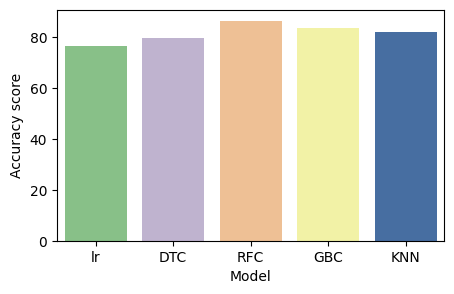

In [46]:
plt.figure(figsize=(5,3))
sns.barplot(x='Model',y='Accuracy score',data=final_result,palette='Accent')
plt.show()

In [47]:
import joblib

In [51]:
joblib.dump(rfc,'churn__pred_model')

['churn__pred_model']

In [50]:
model = joblib.load('/content/churn__pred_model')